In [120]:
import pandas as pd
import numpy as np

In [121]:
df = pd.read_csv("Data Kuisioner Final.csv")

In [122]:
df.head()

,Timestamp,Email,Nama Lengkap,Umur,Jenis Kelamin,Jurusan,NPM,Aplikasi media sosial apa yang sering anda gunakan dalam sehari,Dimana anda biasa menggunakan sosial media,Dengan apa anda mengakses sosial media,...,Apa contoh hal toxic yang pernah kamu alami di media sosial !,Kurang berminat atau bergairah dalam melakukan apapun,"Merasa murung, sedih, atau putus asa","Sulit tidur/mudah terbangun, atau terlalu banyak tidur",Merasa lelah atau kurang bertenaga,Kurang nafsu makan atau terlalu banyak makan,Kurang percaya diri atau merasa bahwa Anda adalah orang yang gagal atau telah mengecewakan diri sendiri,"Sulit berkonsentrasi pada sesuatu, misalnya membaca koran atau menonton televisi",Bergerak atau berbicara sangat lambat sehingga orang lain memperhatikannya. Atau sebaliknya; merasa resah atau gelisah sehingga Anda lebih sering bergerak dari biasanya.,Merasa ingin melukai diri sendiri dengan cara apapun.
0,12/12/2023 17:10:38,amelyapst@gmail.com,amelya ayu puspitasari,19,Perempuan,teknik lingkungan,22034010061,Instagram,Di Rumah,HP,...,-,1,2,4,1,4,3,1,1,1
1,12/12/2023 17:16:50,22034010108@student.upnjatim.ac.id,Jihan Nazifa,19,Perempuan,Teknik Lingkungan,22034010108,Instagram,Di Rumah,HP,...,Sindir menyindir,2,2,3,2,2,2,1,2,2
2,12/12/2023 17:23:36,henokhwau@gmail.com,Henokh Wau,18,Laki-laki,Teknik Lingkungan,22034010021,Instagram,Di Rumah,"Laptop, HP",...,Tidak ada,2,2,3,3,3,2,2,3,1
3,12/12/2023 17:28:22,22034010124@student.upnjatim.ac.id,gibran al ghafari,20,Laki-laki,teknik lingkungan,22034010124,Instagram,Di Rumah,HP,...,saling mengejek lewat balas komentar atau pun ...,3,2,3,2,2,2,3,3,1
4,12/12/2023 17:29:09,aggesbrian12@gmail.com,Agges Brian Darmawan,19 tahun,Laki-laki,TEKNIK LINGKUNGAN,22034010057,Instagram,Di Kampus,HP,...,Tidak ada,1,1,2,2,3,1,1,1,1


# Data Preprocessing

Pertama-tama kita perlu menghapus baris yang memiliki nilai pada atribut NPM double pada dataset. Hal ini perlu dilakukan agar tidak terdapat duplicate value pada dataset

In [123]:
import re

In [124]:
df.drop_duplicates(subset=["NPM"], keep="first", inplace=True)

Selanjutnya kita akan menyamakan semua penulisan pada atribut umur, karena terdapat perbedaan penulisan umur oleh responden. Hal ini dapat diperbaiki dengan library re pada python untuk menghapus karakter non integer pada string

In [125]:
df["Umur"] = df["Umur"].apply(lambda x: int(re.sub("[^0-9]", "", x)))

Kemudian kita akan mengecek apakah terdapat missing value pada dataset ini. Pengecekkan missing value dilakukan agar missing value tidak mengganggu proses analisis kedepannya

In [126]:
df.isna().sum()

Timestamp                                                                                                                                                                                              0
Email                                                                                                                                                                                                  0
Nama Lengkap                                                                                                                                                                                           0
Umur                                                                                                                                                                                                   0
Jenis Kelamin                                                                                                                                                                                       

Dapat dilihat, bahwa tidak terdapat missing value dalam dataset ini. Sehingga kita dapat melanjutkan ke proses selanjutnya.

Setelah melakukan data preprocessing saatnya kita melakukan uji validitas dan reabilitas pada kuisioner skala likert. Uji validitas dapat membantu mengidentifikasi apakah terdapat ketidakpastian atau bias dalam instrumen atau metode pengukuran. Sedangkan uji reabilitas membantu memastikan bahwa instrumen atau alat ukur memberikan hasil yang konsisten setiap kali digunakan.

# Evaluasi Kualitas Penelitian

## Uji Validitas

Uji validitas adalah proses untuk menilai sejauh mana suatu instrumen pengukuran atau metode pengumpulan data mengukur apa yang seharusnya diukur. Dalam konteks penelitian atau pengumpulan data, uji validitas penting untuk memastikan bahwa instrumen atau data yang digunakan benar-benar mengukur konstruk atau variabel yang diinginkan, dan bukan sesuatu yang lain.

Sebuah indikator (atribut) dapat dikatakan valid jika nilai korelasinya dengan jumlah dari semua indikator per baris diatas 0,5

In [127]:
PPMS = df.loc[:,"Seberapa sering anda stalking medsos milik orang lain":"Seberapa sering anda mendapatkan informasi atau pengetahuan terkait jurusan anda di media sosial"]
GH = df.loc[:,"Seberapa sering anda mengakses online shop pada media sosial ":"Seberapa sering anda sebelum Tiktok Shop ditutup, anda membeli barang di media sosial tersebut"]
KM = df.loc[:,"Seberapa setuju anda bahwa sekarang ini banyak terjadi perundungan di media sosial " : "Setujukah anda bahwa penggunaan media sosial dapat mengubah pola pikir seseorang"]
PD = df.loc[:,"Kurang berminat atau bergairah dalam melakukan apapun" : "Merasa ingin melukai diri sendiri dengan cara apapun."]

Pertama-tama kita perlu membagi indikator - indikator skala likert ke dalam 4 variabel yaitu Pengalaman Penggunaan Media Sosial (PPMS), Gaya Hidup (Gaya Hidup), Kesehatan Mental (KM), Penilaian Diri (PD).

In [128]:
def change_column_names(dataframe, question):
    new_column_names = [question + f"{i}" for i in range(len(dataframe.columns))]
    column_mapping = {old_name: new_name for old_name, new_name in zip(dataframe.columns, new_column_names)}
    dataframe.rename(columns=column_mapping, inplace=True)
    return dataframe

Selanjutnya kita membuat fungsi change_column_names yang bertujuan untuk mengubah nama kolom pada dataframe menjadi lebih singkat sehingga mudah untuk dibaca

In [129]:
PPMS = change_column_names(PPMS, "ppms_")
GH = change_column_names(GH, "gh_")
KM = change_column_names(KM, "km_")
PD = change_column_names(PD, "pd_")

In [130]:
PPMS["sum_ppms"] = PPMS.sum(axis=1)
GH["sum_gh"] = GH.sum(axis=1)
KM["sum_km"] = KM.sum(axis=1)
PD["sum_pd"] = PD.sum(axis=1)

Pada kode diatas, kami menambahkan satu kolom yang berisi jumlah dari semua indikator per baris.

### PPMS (Pengalaman Penggunaan Media Sosial)

In [131]:
corr_ppms = PPMS.corr()
corr_ppms

,ppms_0,ppms_1,ppms_2,ppms_3,sum_ppms
ppms_0,1.000000,0.109708,0.251186,-0.010248,0.466237
ppms_1,0.109708,1.000000,0.808263,0.160582,0.810225
ppms_2,0.251186,0.808263,1.000000,0.085987,0.826364
ppms_3,-0.010248,0.160582,0.085987,1.000000,0.502171
sum_ppms,0.466237,0.810225,0.826364,0.502171,1.000000


Dapat dilihat pada tabel diatas, nilai korelasi indikator ppms_0 tidak dapat dikatakan valid. Hal ini disebabkan nilai korelasinya dengan sum_ppms yang dibawah ambang batas. Langkah yang perlu kita lakukan jika menemui kasus seperti ini adalah men-drop indikatornya

In [132]:
PPMS.drop("ppms_0", axis=1, inplace=True)

### GH (Gaya Hidup)

In [133]:
corr_gh = GH.corr()
corr_gh

,gh_0,gh_1,gh_2,gh_3,gh_4,gh_5,gh_6,sum_gh
gh_0,1.000000,0.678126,0.489071,0.577670,0.678612,0.251629,0.442704,0.783222
gh_1,0.678126,1.000000,0.551312,0.462745,0.650664,0.422995,0.551670,0.818610
gh_2,0.489071,0.551312,1.000000,0.474148,0.557660,0.275954,0.561112,0.745532
gh_3,0.577670,0.462745,0.474148,1.000000,0.644751,0.284774,0.491736,0.752844
gh_4,0.678612,0.650664,0.557660,0.644751,1.000000,0.384687,0.485776,0.842957
gh_5,0.251629,0.422995,0.275954,0.284774,0.384687,1.000000,0.296389,0.565675
gh_6,0.442704,0.551670,0.561112,0.491736,0.485776,0.296389,1.000000,0.727753
sum_gh,0.783222,0.818610,0.745532,0.752844,0.842957,0.565675,0.727753,1.000000


Semua indikator valid, tidak ada indikator dibawah nilai ambang batas

### KM (Kesehatan Mental)

In [134]:
corr_km = KM.corr()
corr_km

,km_0,km_1,km_2,km_3,km_4,km_5,km_6,km_7,km_8,km_9,km_10,sum_km
km_0,1.000000,0.615895,0.467087,0.439907,0.457995,0.526031,0.460075,0.305576,0.218675,0.203797,0.186366,0.618737
km_1,0.615895,1.000000,0.716993,0.665848,0.643935,0.652136,0.733609,0.609208,0.357617,0.322486,0.476165,0.861184
km_2,0.467087,0.716993,1.000000,0.739613,0.796316,0.735267,0.735733,0.578682,0.281667,0.185978,0.498739,0.850859
km_3,0.439907,0.665848,0.739613,1.000000,0.822417,0.637729,0.648744,0.420422,0.427229,0.188289,0.425518,0.811663
km_4,0.457995,0.643935,0.796316,0.822417,1.000000,0.714427,0.626853,0.432784,0.320014,0.163523,0.387531,0.803938
km_5,0.526031,0.652136,0.735267,0.637729,0.714427,1.000000,0.681787,0.462213,0.329579,0.215789,0.431311,0.803993
km_6,0.460075,0.733609,0.735733,0.648744,0.626853,0.681787,1.000000,0.567409,0.305394,0.179697,0.565946,0.823103
km_7,0.305576,0.609208,0.578682,0.420422,0.432784,0.462213,0.567409,1.000000,0.272624,0.215213,0.399921,0.680596
km_8,0.218675,0.357617,0.281667,0.427229,0.320014,0.329579,0.305394,0.272624,1.000000,0.403316,0.378343,0.547269
km_9,0.203797,0.322486,0.185978,0.188289,0.163523,0.215789,0.179697,0.215213,0.403316,1.000000,0.513692,0.448038


Indikator km_9 dikatakan tidak valid karena nilai korelasinya dengan sum_km yang dibawah ambang batas.

In [135]:
KM.drop("km_9", axis=1, inplace=True)

### PD (Penilaian Diri)

In [136]:
corr_pd = PD.corr()
corr_pd

,pd_0,pd_1,pd_2,pd_3,pd_4,pd_5,pd_6,pd_7,pd_8,sum_pd
pd_0,1.000000,0.660590,0.272416,0.597001,0.347283,0.446333,0.532289,0.456579,0.033355,0.728800
pd_1,0.660590,1.000000,0.284477,0.461693,0.506257,0.485989,0.290827,0.481580,0.223848,0.727441
pd_2,0.272416,0.284477,1.000000,0.499653,0.420416,0.548635,0.377316,0.463196,0.049695,0.670851
pd_3,0.597001,0.461693,0.499653,1.000000,0.395462,0.355690,0.658898,0.561972,0.068119,0.767285
pd_4,0.347283,0.506257,0.420416,0.395462,1.000000,0.454203,0.308965,0.379681,0.217485,0.678745
pd_5,0.446333,0.485989,0.548635,0.355690,0.454203,1.000000,0.374664,0.567329,0.053079,0.729304
pd_6,0.532289,0.290827,0.377316,0.658898,0.308965,0.374664,1.000000,0.523018,-0.061862,0.670160
pd_7,0.456579,0.481580,0.463196,0.561972,0.379681,0.567329,0.523018,1.000000,0.161120,0.765356
pd_8,0.033355,0.223848,0.049695,0.068119,0.217485,0.053079,-0.061862,0.161120,1.000000,0.246926
sum_pd,0.728800,0.727441,0.670851,0.767285,0.678745,0.729304,0.670160,0.765356,0.246926,1.000000


Indikator pd_9 dikatakan tidak valid karena nilai korelasinya dengan sum_pd yang dibawah ambang batas.

In [137]:
PD.drop("pd_8", axis=1, inplace=True)

Setelah dilakukan uji validitas masing-masing variabel, selanjutnya adalah uji reabilitas

## Uji Reabilitas

Uji reabilitas pada data adalah suatu proses evaluasi untuk menilai sejauh mana suatu instrumen pengukuran atau alat ukur dapat diandalkan dan konsisten dalam mengukur konsep atau variabel tertentu. Fungsi uji reabilitas pada data adalah untuk memastikan bahwa instrumen atau alat ukur yang digunakan dalam penelitian atau pengumpulan data memberikan hasil yang stabil dan dapat diandalkan.

Sebuah variabel dapat dikatakan reliabel jika memiliki nilai cronbach alpha lebih dari 0,6

In [138]:
def cronbach_alpha(df):
    # 1. Transform the df into a correlation matrix
    df_corr = df.corr()
    
    # 2.1 Calculate N
    # The number of variables equals the number of columns in the df
    N = df.shape[1]
    
    # 2.2 Calculate R
    # For this, we'll loop through the columns and append every
    # relevant correlation to an array calles "r_s". Then, we'll
    # calculate the mean of "r_s"
    rs = np.array([])
    for i, col in enumerate(df_corr.columns):
        sum_ = df_corr[col][i+1:].values
        rs = np.append(sum_, rs)
    mean_r = np.mean(rs)
    
   # 3. Use the formula to calculate Cronbach's Alpha 
    cronbach_alpha = (N * mean_r) / (1 + (N - 1) * mean_r)
    return cronbach_alpha

Fungsi cronbach_alpha merupakan fungsi yang bertujuan menghitung nilai cronbach alpha untuk menguji reabilitas

### PPMS (Pengalaman Penggunaan Media Sosial)

In [139]:
cronbach_alpha(PPMS.drop("sum_ppms", axis=1))

0.6193157107526954

### GH (Gaya Hidup)

In [140]:
cronbach_alpha(GH.drop("sum_gh", axis=1))

0.8689214671739006

### KM (Kesehatan Mental)

In [141]:
cronbach_alpha(KM.drop("sum_km", axis=1))

0.9138070500008382

### PD (Penilaian Diri)

In [142]:
cronbach_alpha(PD.drop("sum_pd", axis=1))

0.8693222072121202

Dari uji reabilitas diatas dapat disimpulkan bahwa semua variabel dapat dikatakan reliabel. Hal ini dibuktikan dari nilai cronbach alpha di setiap variabel sudah lebih dari 0,6

# Exploratory Data Analysis Univariate

In [143]:
import matplotlib.pyplot as plt
import seaborn as sns

In [144]:
count_gender = df["Jenis Kelamin"].value_counts()

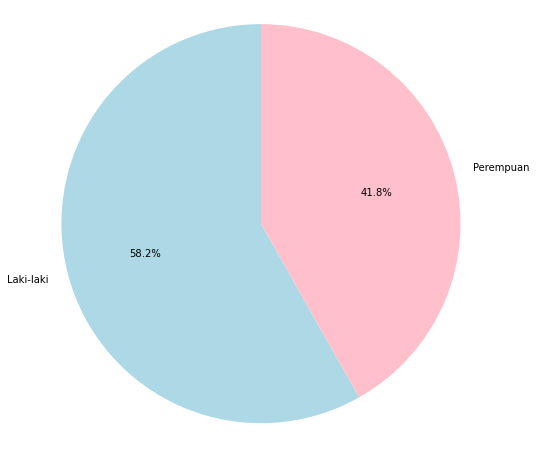

In [145]:
plt.figure(figsize=(8, 8))
plt.pie(count_gender, labels=count_gender.index, autopct='%1.1f%%', startangle=90, colors=['lightblue','pink'])
plt.axis('equal')
plt.show()

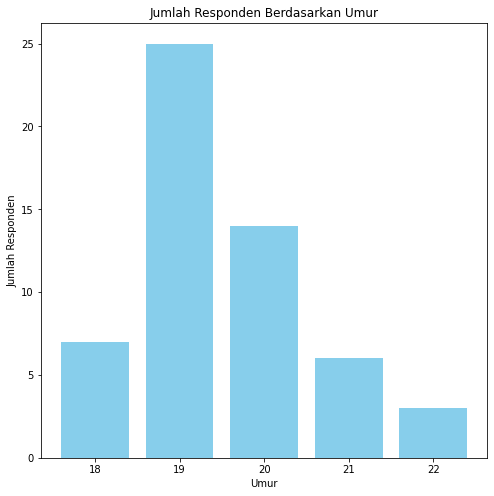

In [146]:
plt.figure(figsize=(8, 8))
count_umur = df['Umur'].value_counts()
count_umur = count_umur.sort_index()
plt.bar(count_umur.index, count_umur.values, color='skyblue')
plt.xlabel('Umur')
plt.ylabel('Jumlah Responden')
plt.title('Jumlah Responden Berdasarkan Umur')
plt.show()

Survei ini dilakukan pada mahasiswa teknik lingkungan universitas UPN "Veteran" Jawa Timur. Pada piechart diatas, responden pria memiliki presentase 58,2% dan responden perempuan memiliki presentase 41,8% dari total seluruh responden. Dimana responden berumur di antara 18 sampai 22 tahun. Berdasarkan barchart usia responden didominasi oleh responden berusia 19 tahun dengan banyak 25 responden dan paling sedikit adalah responden berusia 22 tahun.

In [147]:
count_time = df["Seberapa sering anda menggunakan media sosial dalam sehari"].value_counts()

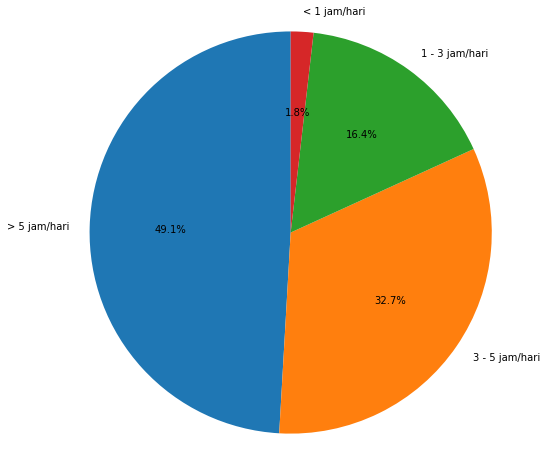

In [148]:
plt.figure(figsize=(8, 8))
plt.pie(count_time, labels=count_time.index, autopct='%1.1f%%', startangle=90)
plt.axis('equal')
plt.show()

Berdasarkan pie chart di atas, dapat dilihat bahwa distribusi waktu yang dihabiskan oleh responden setiap hari bervariasi. Hampir setengah dari responden, atau tepatnya 49.1%, menghabiskan lebih dari lima jam setiap hari untuk bermedia sosial. Sementara itu, sekitar sepertiga responden, atau 32.7%, menghabiskan waktu antara tiga hingga lima jam setiap hari. Ada juga sebagian kecil responden, sebesar 16.4%, yang menghabiskan waktu antara satu hingga tiga jam setiap hari. Hanya sejumlah kecil responden, yaitu 1.8%, yang menghabiskan waktu kurang dari satu jam setiap hari.

### Aplikasi Media Sosial yang sering digunakan berdasarkan usia

<Figure size 576x576 with 0 Axes>

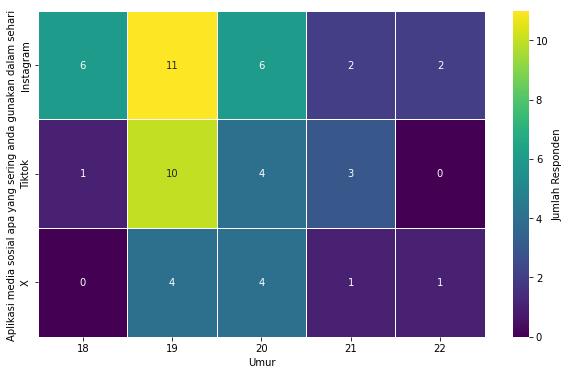

In [149]:
plt.figure(figsize=(8, 8))
plt.figure(figsize=(10, 6))
heatmap_data = df.pivot_table(index='Aplikasi media sosial apa yang sering anda gunakan dalam sehari ', columns='Umur', aggfunc='size', fill_value=0)
sns.heatmap(heatmap_data, cmap='viridis', annot=True, fmt='d', linewidths=.5, cbar_kws={'label': 'Jumlah Responden'})
plt.show()

Dari tabel heatmap diatas, didapatkan fakta bahwa:

- Responden berusia 18 tahun cenderung menggunakan Instagram
- Responden berusia 19 tahun cenderung menggunakan Tiktok
- Responden berusia 20 tahun cenderung menggunakan Instagram
- Responden berusia 21 tahun cenderung menggunakan Tiktok
- Responden berusia 22 tahun cenderung menggunakan Instagram

### Aplikasi Media Sosial yang sering digunakan berdasarkan jenis kelamin

<AxesSubplot:xlabel='Aplikasi media sosial apa yang sering anda gunakan dalam sehari ', ylabel='count'>

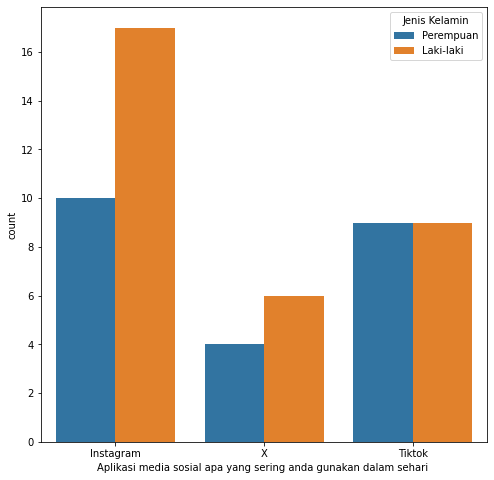

In [150]:
plt.figure(figsize=(8, 8))
sns.countplot(x="Aplikasi media sosial apa yang sering anda gunakan dalam sehari ", hue="Jenis Kelamin", data=df)

Dari tabel diatas dapat dilihat bahwa responden laki - laki lebih sering menggunakan Instagram dan X ketimbang responden perempuan, sedangkan untuk Tiktok responden laki-laki dan perempuan berjumlah sama.

### Aplikasi Media Sosial berdasarkan seberapa sering menggunakannya

<AxesSubplot:xlabel='Aplikasi media sosial apa yang sering anda gunakan dalam sehari ', ylabel='count'>

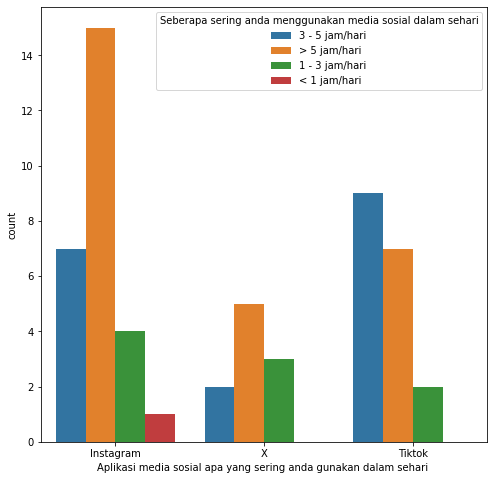

In [151]:
plt.figure(figsize=(8, 8))
sns.countplot(x="Aplikasi media sosial apa yang sering anda gunakan dalam sehari ", hue="Seberapa sering anda menggunakan media sosial dalam sehari", data=df)

Berdasarkan tabel diatas, didapatkan fakta bahwa:
- Responden yang sering menggunakan Instagram dan X kebanyakan dalam sehari menghabiskan waktu di sosial media lebih dari 5 jam. Sedangkan responden yang sering menggunakan Tiktok kebanyakan dalam sehari menghabiskan waktu 3 sampai 5 jam di media sosial.
- Responden yang menggunakan media sosial lebih dari 5 jam, kebanyakan sering menggunakan Instagram
- Responden yang menggunakan media sosial antara 3 - 5 jam, kebanyakan sering menggunakan Tiktok
- Responden yang menggunakan media sosial antara 1 - 3 jam, kebanyakan sering menggunakan Instagram
- Responden yang menggunakan media sosial kurang dari 1 jam menggunakan Instagram, meskipun jumlahnya hanya sedikit.

### Dimana tempat mengakses media sosial berdasarkan lama waktu menggunakan media sosial

<AxesSubplot:xlabel='Dimana anda biasa menggunakan sosial media', ylabel='count'>

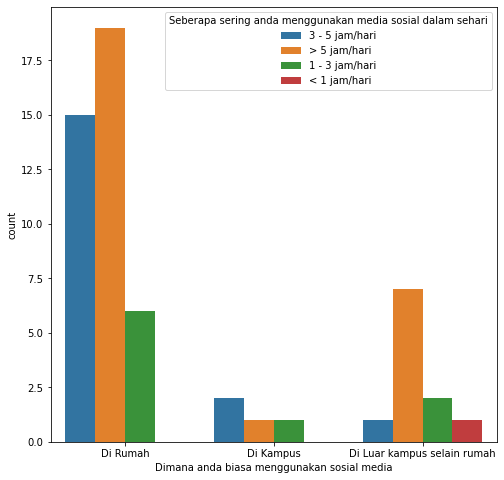

In [152]:
plt.figure(figsize=(8, 8))
sns.countplot(x="Dimana anda biasa menggunakan sosial media", hue="Seberapa sering anda menggunakan media sosial dalam sehari", data=df)

Pada grafik diatas, dapat diambil kesimpulan responden yang menghabiskan waktu lebih dari 5 jam dalam bermedia sosial rata-rata menggunakan media sosial di luar lingkungan kampus. Hal ini dapat dilihat dari grafik dimana nilai lama bermedia sosial dari responden yang biasa menggunakan media sosial di kampus tertinggal jauh ketimbang lainnya.

### Lama mengakses media sosial berdasarkan Usia

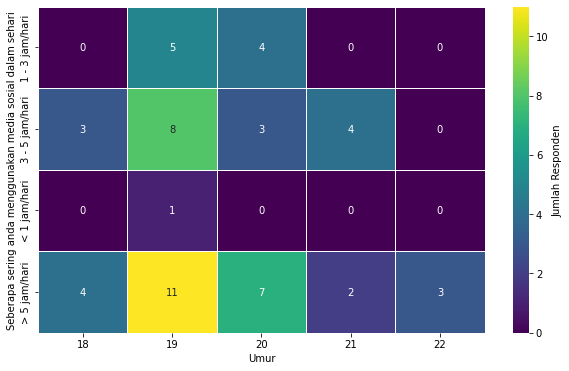

In [153]:
plt.figure(figsize=(10, 6))
heatmap_data = df.pivot_table(index='Seberapa sering anda menggunakan media sosial dalam sehari', columns='Umur', aggfunc='size', fill_value=0)
sns.heatmap(heatmap_data, cmap='viridis', annot=True, fmt='d', linewidths=.5, cbar_kws={'label': 'Jumlah Responden'})
plt.show()

Dari tabel heatmap di atas, didapatkan fakta bahwa:
- Responden berusia 18 tahun cenderung menghabiskan waktu > 5 jam bermedia sosial
- Responden berusia 19 tahun cenderung menghabiskan waktu > 5 jam bermedia sosial
- Responden berusia 20 tahun cenderung menghabiskan waktu > 5 jam bermedia sosial
- Responden berusia 21 tahun cenderung menghabiskan waktu 3 - 5 jam bermedia sosial
- Responden berusia 22 tahun cenderung menghabiskan waktu > 5 jam bermedia sosial

### Konten yang sering dilihat berdasarkan media sosial yang sering digunakan

In [154]:
def piechart_concat_arr(data):
    combined_array = np.concatenate(data.values)
    unique_values, counts = np.unique(combined_array, return_counts=True)
    result_df = pd.DataFrame({'Unique Value': unique_values, 'Count': counts})
    plt.figure(figsize=(8, 8))
    plt.pie(counts, labels=None, autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors)
    plt.legend(unique_values, title="Konten yang sering dilihat", loc="center left", bbox_to_anchor=(1, 0.5))
    plt.axis('equal')
    plt.show()

Fungsi piechart_concat_arr bertujuan untuk membuat pie chart yang memvisualisasikan distribusi dari nilai unik yang muncul dalam sebuah DataFrame, di mana kolomnya berisi array 1 dimensi. Fungsi ini menggabungkan semua array menjadi satu, menghitung nilai unik dan jumlah kemunculannya, dan kemudian menggunakan pie chart untuk menunjukkan proporsi dari setiap nilai unik.

In [155]:
insta_content = df[df["Aplikasi media sosial apa yang sering anda gunakan dalam sehari "] == "Instagram"]["Konten yang sering dilihat"].apply(lambda x: x.lower().split(", "))

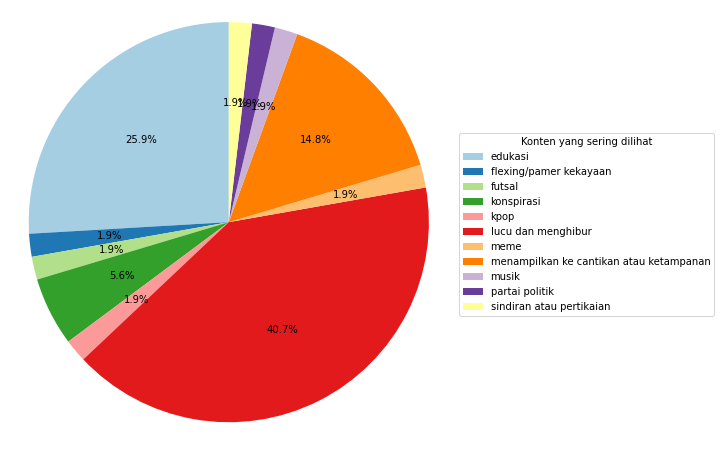

In [156]:
piechart_concat_arr(insta_content)

Dari piechart diatas, dapat dilihat bahwa konten yang sering dilihat responden di Instagram didominasi oleh konten lucu dan menghibur, menampilkan kecantikan dan ketampanan, serta konten edukasi.

In [157]:
tiktok_content = df[df["Aplikasi media sosial apa yang sering anda gunakan dalam sehari "] == "Tiktok"]["Konten yang sering dilihat"].apply(lambda x: x.lower().split(", "))

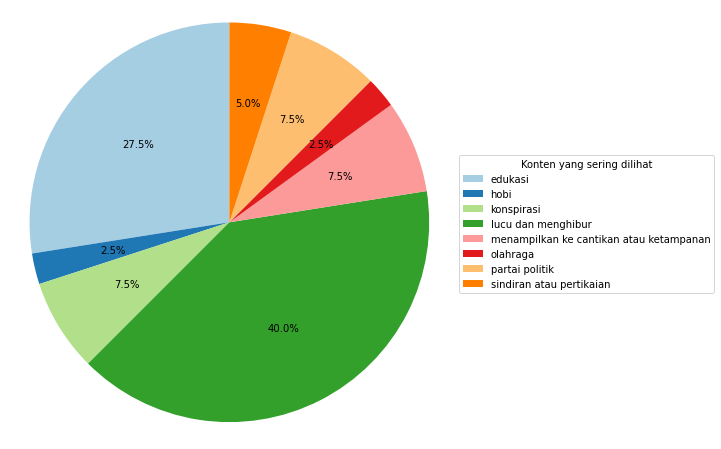

In [158]:
piechart_concat_arr(tiktok_content)

Pada grafik diatas, konten yang sering dilihat responden di Tiktok cenderung lebih merata ketimbang di Instagram. Dimana dari pychart ini dapat dilihat bahwa konten lucu dan menghibur dan konten edukasi yang mendominasi.

In [159]:
x_content = df[df["Aplikasi media sosial apa yang sering anda gunakan dalam sehari "] == "X"]["Konten yang sering dilihat"].apply(lambda x: x.lower().split(", "))

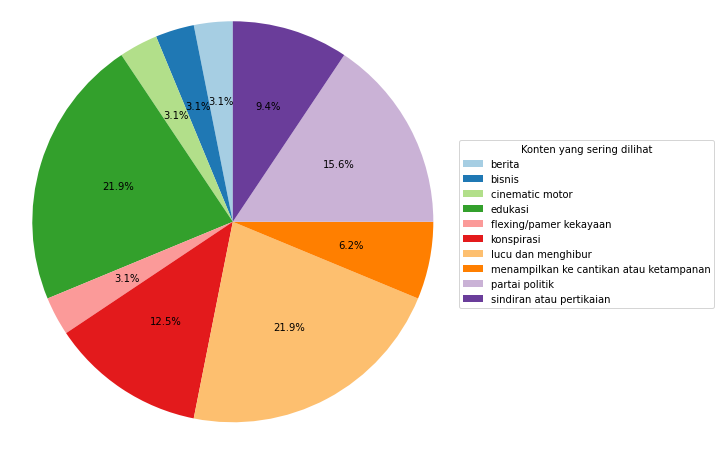

In [160]:
piechart_concat_arr(x_content)

Pada grafik diatas, dapat dilihat bahwa konten di X cenderung lebih merata ketimbang Tiktok dan Instagram. Dimana konten yang sering muncul didominasi oleh konten edukasi, konten konspirasi, konten lucu dan menghibur, konten partai politik dan konten sindiran dan pertikaian.

# Analisis Data Text

In [161]:
import nltk
import Sastrawi

Hal pertama yang perlu kita lakukan  pada analisis data text ialah memilih kolom pendapat responden. Pada data ini terdapat tiga kolom yaitu:
- Pendapat responden mengenai kebijakan pemerintah yang telah menutup Tiktok Shop
- Pendapat responden mengenai lingkungan media sosial yang toxic dan menggangu kesehatan mental
- Pengalaman toxic bermedia sosial yang pernah dialami oleh responden

In [162]:
text_df = df[["Apa pendapat anda mengenai kebijakan pemerintah yang telah menutup Tiktok Shop ? Setuju atau tidak setuju mohon diberikan alasannya !","Apa kamu setuju bahwa lingkungan dalam media sosial yang sering anda gunakan saat ini sangat toxic dan dapat menggangu kesehatan mental anda ? setuju atau tidak setuju mohon diberikan alasannya !", "Apa contoh hal toxic yang pernah kamu alami di media sosial !"]]

In [163]:
text_df

,Apa pendapat anda mengenai kebijakan pemerintah yang telah menutup Tiktok Shop ? Setuju atau tidak setuju mohon diberikan alasannya !,Apa kamu setuju bahwa lingkungan dalam media sosial yang sering anda gunakan saat ini sangat toxic dan dapat menggangu kesehatan mental anda ? setuju atau tidak setuju mohon diberikan alasannya !,Apa contoh hal toxic yang pernah kamu alami di media sosial !
0,"setuju asal ga plin plan, awalnya its oke ales...",tidak karena saya tidak menelan mentah mentah ...,-
1,Tidak setuju karena penawaran yg diberikam Tik...,Tidak setuju karena tidak merugikan saya,Sindir menyindir
2,Tidak setuju 😊 karena saya suka berbelanja di ...,Setuju karena banyak yang memberi opini yang m...,Tidak ada
3,"setuju,karena umkm lokal jadi sepi peminat dan...",setuju karena begitu banyak konten yang lewat ...,saling mengejek lewat balas komentar atau pun ...
4,Tidak setuju dikarenakan membantu UMKM juga be...,"Tidak, dikarenakan tidak ada pembahasan yang m...",Tidak ada
5,Kurang setuju sih,B aja,Toxic di mobile legends
6,"tidak setuju, karena tiktok shop juga bermanfa...",setuju karena orang orang melihat standar apap...,tidak ada
7,"Tidak , karena tiktok shop dapat membantu umkm","Setuju , karena banyak sekali omongan manusia ...",Body shaming
8,tidak setuju,setuju karna biasanya pendapat atau cara panda...,cara pandang untuk berusaha merubah pola hidup...
9,"Setuju, karena toko yang ditampilkan mayoritas...","tidak setuju, karena di sosial media dapat mem...",cyber bullying


Untuk mempermudah proses analisis maka nama kolom kita dapat singkat sehingga mempermudah proses analisis.

In [164]:
text_df.set_axis(["gh_text", "km_1_text", "km_2_text"], axis="columns", inplace=True)

Pada kode tersebut, fungsi set_axis digunakan untuk mengganti label kolom pada DataFrame yang disebut text_df. Dengan menggunakan parameter ["gh_text", "km_1_text", "km_2_text"], label kolom pada DataFrame tersebut diubah menjadi "gh_text" untuk kolom pertama, "km_1_text" untuk kolom kedua, dan "km_2_text" untuk kolom ketiga. Dengan parameter axis="columns", pengubahan tersebut dilakukan pada label kolom (bukan baris), dan inplace=True menandakan bahwa perubahan ini dilakukan secara langsung pada DataFrame yang ada, tanpa perlu membuat DataFrame baru. Dengan kata lain, kode ini bertujuan untuk memberikan label baru pada kolom-kolom tertentu dalam DataFrame text_df.

## Preparing Data Text

In [165]:
import string

In [166]:
def preprocessing_data(txt):
    lower_case = txt.lower() # Mengubah kalimat menjadi huruf kecil
    remove_num = re.sub(r"\d+", "", lower_case) # Menghapus angka dari kalimat
    remove_punctuation = remove_num.translate(str.maketrans("","",string.punctuation)) #Menghapus tanda baca
    return remove_punctuation.strip()

In [167]:
text_df["clean_gh_text"] = text_df["gh_text"].apply(preprocessing_data)
text_df["clean_km_1_text"] = text_df["km_1_text"].apply(preprocessing_data)
text_df["clean_km_2_text"] = text_df["km_2_text"].apply(preprocessing_data)

C:\Users\ramad\AppData\Local\Temp\ipykernel_8072\1398365764.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  text_df["clean_gh_text"] = text_df["gh_text"].apply(preprocessing_data)
C:\Users\ramad\AppData\Local\Temp\ipykernel_8072\1398365764.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  text_df["clean_km_1_text"] = text_df["km_1_text"].apply(preprocessing_data)
C:\Users\ramad\AppData\Local\Temp\ipykernel_8072\1398365764.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice 

## Handling Slang Language

In [168]:
import csv

In [169]:
file_path = 'kbba.tsv'

def read_csv_to_dict(file_path):
    result_dict = {}
    with open(file_path, 'r', encoding='utf-8') as csvfile:
        csv_reader = csv.reader(csvfile, delimiter='\t')  # Adjust delimiter based on your file format
        for row in csv_reader:
            if len(row) == 2:  # Ensure there are two columns in each row
                key, value = row
                result_dict[key] = value
    return result_dict

slang_dict = read_csv_to_dict(file_path)

In [170]:
def handling_slang(txt):
    return ' '.join([slang_dict.get(t, t) for t in txt.split()])

In [171]:
text_df["no_slang_gh_text"] = text_df["clean_gh_text"].apply(handling_slang)
text_df["no_slang_km_1_text"] = text_df["clean_km_1_text"].apply(handling_slang)
text_df["no_slang_km_2_text"] = text_df["clean_km_2_text"].apply(handling_slang)

C:\Users\ramad\AppData\Local\Temp\ipykernel_8072\1856511196.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  text_df["no_slang_gh_text"] = text_df["clean_gh_text"].apply(handling_slang)
C:\Users\ramad\AppData\Local\Temp\ipykernel_8072\1856511196.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  text_df["no_slang_km_1_text"] = text_df["clean_km_1_text"].apply(handling_slang)
C:\Users\ramad\AppData\Local\Temp\ipykernel_8072\1856511196.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy o

## Tokenize

In [172]:
def token_text(txt):
    return nltk.tokenize.word_tokenize(txt)

In [173]:
text_df["token_gh_text"] = text_df["no_slang_gh_text"].apply(token_text)
text_df["token_km_1_text"] = text_df["no_slang_km_1_text"].apply(token_text)
text_df["token_km_2_text"] = text_df["no_slang_km_2_text"].apply(token_text)

C:\Users\ramad\AppData\Local\Temp\ipykernel_8072\3874838921.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  text_df["token_gh_text"] = text_df["no_slang_gh_text"].apply(token_text)
C:\Users\ramad\AppData\Local\Temp\ipykernel_8072\3874838921.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  text_df["token_km_1_text"] = text_df["no_slang_km_1_text"].apply(token_text)
C:\Users\ramad\AppData\Local\Temp\ipykernel_8072\3874838921.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slic

## Filtering (Stopword Removal)

In [174]:
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
factory = StopWordRemoverFactory()
stopwords = factory.get_stop_words()
print(stopwords)

['yang', 'untuk', 'pada', 'ke', 'para', 'namun', 'menurut', 'antara', 'dia', 'dua', 'ia', 'seperti', 'jika', 'jika', 'sehingga', 'kembali', 'dan', 'tidak', 'ini', 'karena', 'kepada', 'oleh', 'saat', 'harus', 'sementara', 'setelah', 'belum', 'kami', 'sekitar', 'bagi', 'serta', 'di', 'dari', 'telah', 'sebagai', 'masih', 'hal', 'ketika', 'adalah', 'itu', 'dalam', 'bisa', 'bahwa', 'atau', 'hanya', 'kita', 'dengan', 'akan', 'juga', 'ada', 'mereka', 'sudah', 'saya', 'terhadap', 'secara', 'agar', 'lain', 'anda', 'begitu', 'mengapa', 'kenapa', 'yaitu', 'yakni', 'daripada', 'itulah', 'lagi', 'maka', 'tentang', 'demi', 'dimana', 'kemana', 'pula', 'sambil', 'sebelum', 'sesudah', 'supaya', 'guna', 'kah', 'pun', 'sampai', 'sedangkan', 'selagi', 'sementara', 'tetapi', 'apakah', 'kecuali', 'sebab', 'selain', 'seolah', 'seraya', 'seterusnya', 'tanpa', 'agak', 'boleh', 'dapat', 'dsb', 'dst', 'dll', 'dahulu', 'dulunya', 'anu', 'demikian', 'tapi', 'ingin', 'juga', 'nggak', 'mari', 'nanti', 'melainkan', '

In [175]:
def stopword_text(txt):
    clean = []
    for token in txt:
        if token not in stopwords:
            clean.append(txt)
    return clean

In [176]:
text_df["no_stopwords_gh_text"] = text_df["token_gh_text"].apply(stopword_text)
text_df["no_stopwords_km_1_text"] = text_df["token_km_1_text"].apply(stopword_text)
text_df["no_stopwords_km_2_text"] = text_df["token_km_2_text"].apply(stopword_text)

C:\Users\ramad\AppData\Local\Temp\ipykernel_8072\650076230.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  text_df["no_stopwords_gh_text"] = text_df["token_gh_text"].apply(stopword_text)
C:\Users\ramad\AppData\Local\Temp\ipykernel_8072\650076230.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  text_df["no_stopwords_km_1_text"] = text_df["token_km_1_text"].apply(stopword_text)
C:\Users\ramad\AppData\Local\Temp\ipykernel_8072\650076230.py:3: SettingWithCopyWarning: 
A value is trying to be set on a cop

## Stemming

In [177]:
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
stem_factory = StemmerFactory()
stemmer = stem_factory.create_stemmer()

In [178]:
def stemming_text(txt):
    return [stemmer.stem(t) for t in txt]

In [179]:
text_df["stem_gh_text"] = text_df["no_stopwords_gh_text"].apply(stopword_text)
text_df["stem_km_1_text"] = text_df["no_stopwords_km_1_text"].apply(stopword_text)
text_df["stem_km_2_text"] = text_df["no_stopwords_km_2_text"].apply(stopword_text)

C:\Users\ramad\AppData\Local\Temp\ipykernel_8072\3170526655.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  text_df["stem_gh_text"] = text_df["no_stopwords_gh_text"].apply(stopword_text)
C:\Users\ramad\AppData\Local\Temp\ipykernel_8072\3170526655.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  text_df["stem_km_1_text"] = text_df["no_stopwords_km_1_text"].apply(stopword_text)
C:\Users\ramad\AppData\Local\Temp\ipykernel_8072\3170526655.py:3: SettingWithCopyWarning: 
A value is trying to be set on a co

## Wordcloud

In [180]:
from wordcloud import WordCloud

In [181]:
text_df["stem_gh_text"] = text_df["stem_gh_text"].apply(lambda x: np.array(x).reshape(-1))
text_df["stem_km_1_text"] = text_df["stem_km_1_text"].apply(lambda x: np.array(x).reshape(-1))
text_df["stem_km_2_text"] = text_df["stem_km_2_text"].apply(lambda x: np.array(x).reshape(-1))

C:\Users\ramad\AppData\Local\Temp\ipykernel_8072\309071611.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  text_df["stem_gh_text"] = text_df["stem_gh_text"].apply(lambda x: np.array(x).reshape(-1))
C:\Users\ramad\AppData\Local\Temp\ipykernel_8072\309071611.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  text_df["stem_km_1_text"] = text_df["stem_km_1_text"].apply(lambda x: np.array(x).reshape(-1))
C:\Users\ramad\AppData\Local\Temp\ipykernel_8072\309071611.py:3: SettingWithCopyWarning: 
A value is try

In [182]:
def generate_wordcloud(data, array_column, max_words=25):
    data['teks_string'] = data[array_column].apply(lambda x: ' '.join(x))
    text_data = ' '.join(data['teks_string'].values)
    wordcloud = WordCloud(width=800, height=400, background_color='white', max_words=max_words).generate(text_data)


    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()

### Wordcloud Pendapat responden mengenai kebijakan pemerintah yang telah menutup Tiktok Shop

C:\Users\ramad\AppData\Local\Temp\ipykernel_8072\146299126.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['teks_string'] = data[array_column].apply(lambda x: ' '.join(x))


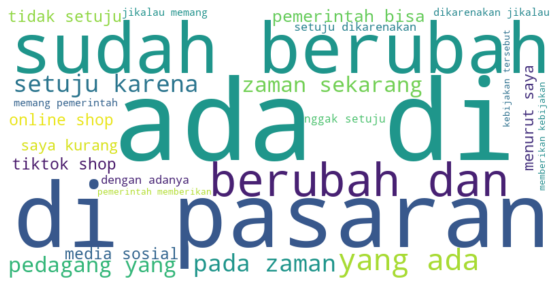

In [183]:
generate_wordcloud(text_df, "stem_gh_text")

### Interpretasi :
Wordcloud tersebut menggambarkan berbagai pendapat responden mengenai kebijakan pemerintah yang telah menutup Tiktok Shop. Terdapat kata-kata seperti “sudah berubah” dan “pasaran” yang menunjukkan bahwa beberapa orang percaya telah terjadi perubahan signifikan di pasar akibat kebijakan ini. Selain itu, terdapat kata “setuju” dan “tidak setuju” yang menunjukkan adanya perbedaan pendapat. Kata-kata yang berkaitan dengan pemerintah, media sosial, dan toko online menunjukkan bahwa kebijakan ini telah mempengaruhi berbagai aspek masyarakat dan perdagangan. Dengan demikian, wordcloud ini memberikan gambaran tentang bagaimana responden merespons penutupan Tiktok Shop oleh pemerintah.

### Wordcloud Pendapat responden mengenai lingkungan media sosial yang toxic dan menggangu kesehatan mental

C:\Users\ramad\AppData\Local\Temp\ipykernel_8072\146299126.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['teks_string'] = data[array_column].apply(lambda x: ' '.join(x))


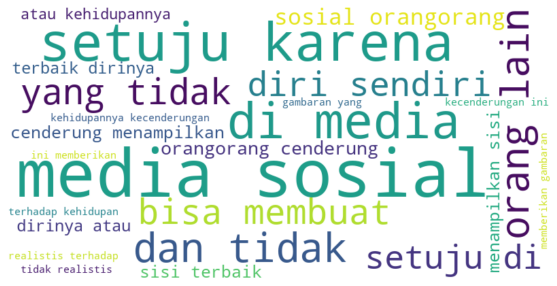

In [184]:
generate_wordcloud(text_df, "stem_km_1_text")

### Interpretasi :
Wordcloud tersebut mencerminkan pendapat responden tentang lingkungan media sosial yang toxic dan berdampak pada kesehatan mental. Kata-kata seperti “setuju”, “media sosial”, dan “orang lain” menonjol, menunjukkan bahwa banyak responden setuju bahwa media sosial dapat memiliki dampak negatif pada persepsi diri dan kesejahteraan mental individu. Ada kecenderungan untuk membandingkan diri dengan orang lain di media sosial, yang seringkali menyajikan gambaran yang tidak realistis tentang kehidupan mereka. Hal ini dapat menciptakan tekanan dan ekspektasi yang tidak sehat. Oleh karena itu, wordcloud ini menunjukkan bahwa banyak orang merasa bahwa media sosial dapat menciptakan lingkungan yang toxic dan berpotensi mengganggu kesehatan mental.

### Wordcloud Pengalaman toxic bermedia sosial yang pernah dialami oleh responden

C:\Users\ramad\AppData\Local\Temp\ipykernel_8072\146299126.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['teks_string'] = data[array_column].apply(lambda x: ' '.join(x))


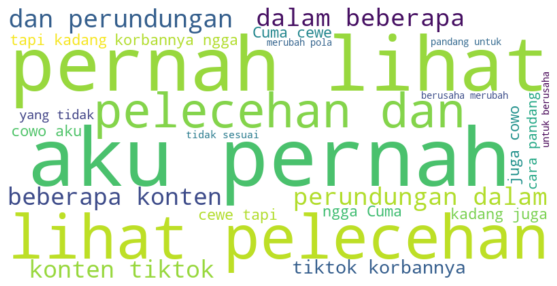

In [185]:
generate_wordcloud(text_df, "stem_km_2_text")

### Interpretasi :
Wordcloud tersebut mencerminkan pengalaman toxic yang pernah dialami oleh responden saat berinteraksi di media sosial. Kata-kata seperti “pelecehan,” “perundungan,” dan “lihat” menonjol, menunjukkan bahwa pelecehan dan perundungan adalah masalah umum yang dialami oleh responden. Kata-kata “aku” dan “pernah” mengindikasikan bahwa responden secara pribadi telah mengalami atau melihat insiden-insiden tersebut. Selain itu, kata-kata seperti “cara pandang” dan “merubah pola” mungkin menunjukkan upaya responden untuk mengatasi atau merespons pengalaman toxic tersebut.

## Sentimen Analisis menggunakan Kamus Lexicon Indonesia

In [186]:
lexicon_positive = dict()
with open("positive.csv", "r") as csvfile:
    reader = csv.reader(csvfile, delimiter=",")
    next(reader)
    for row in reader:
        lexicon_positive[row[0]] = int(row[1])

lexicon_negative = dict()
with open("negative.csv", "r") as csvfile:
    reader = csv.reader(csvfile, delimiter=",")
    next(reader)
    for row in reader:
        lexicon_negative[row[0]] = int(row[1])

In [187]:
def score(col):
    score = 0
    col = col.split()
    for word in col:
        if word in list(lexicon_positive.keys()):
            score = score + lexicon_positive[word]
    for word in col:
        if word in list(lexicon_negative.keys()):
            score += lexicon_negative[word]
    return score

In [188]:
def sentiment(col):
    if col > 0:
        sentiment = "positive"
    elif col < 0:
        sentiment = "negative"
    else:
        sentiment = "neutral"
    return sentiment

### Analisis Sentimen dengan Lexicon pada Pendapat responden mengenai kebijakan pemerintah yang telah menutup Tiktok Shop

In [189]:
text_df["score_gh"] = text_df["no_slang_gh_text"].apply(score)

C:\Users\ramad\AppData\Local\Temp\ipykernel_8072\1403613500.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  text_df["score_gh"] = text_df["no_slang_gh_text"].apply(score)


In [190]:
text_df["sentiment_gh"] = text_df["score_gh"].apply(sentiment)

C:\Users\ramad\AppData\Local\Temp\ipykernel_8072\3242890374.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  text_df["sentiment_gh"] = text_df["score_gh"].apply(sentiment)


In [191]:
text_df[["score_gh", "sentiment_gh"]]

,score_gh,sentiment_gh
0,-3,negative
1,-6,negative
2,-8,negative
3,-12,negative
4,0,neutral
5,-2,negative
6,1,positive
7,-8,negative
8,-4,negative
9,-10,negative


In [192]:
counts_gh = text_df["sentiment_gh"].value_counts()

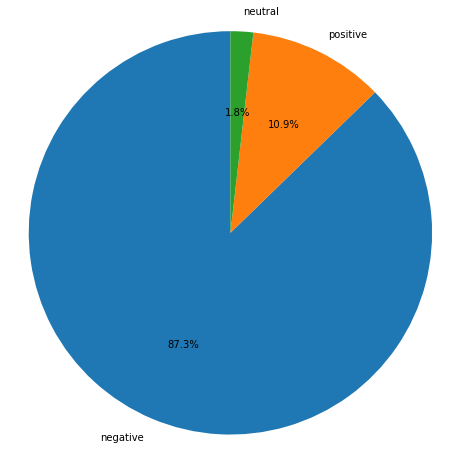

In [193]:
plt.figure(figsize=(8, 8))
plt.pie(counts_gh, labels=counts_gh.index, autopct='%1.1f%%', startangle=90)
plt.axis('equal')
plt.show()

Berdasarkan pie chart di atas, tampak bahwa sebagian besar responden (87.3%) memiliki sentimen negatif terhadap kebijakan pemerintah yang telah menutup Tiktok Shop. Hanya sekitar 10.9% responden yang memiliki sentimen positif, sementara 1.8% lainnya memiliki sentimen netral. Ini menunjukkan bahwa kebijakan penutupan Tiktok Shop oleh pemerintah mendapatkan reaksi yang cenderung negatif dari responden.

### Analisis Sentimen dengan Lexicon pada Pendapat responden mengenai lingkungan media sosial yang toxic dan menggangu kesehatan mental

In [194]:
text_df["score_km_1"] = text_df["no_slang_km_1_text"].apply(score)

C:\Users\ramad\AppData\Local\Temp\ipykernel_8072\1369122038.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  text_df["score_km_1"] = text_df["no_slang_km_1_text"].apply(score)


In [195]:
text_df["sentiment_km_1"] = text_df["score_km_1"].apply(sentiment)

C:\Users\ramad\AppData\Local\Temp\ipykernel_8072\3821359264.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  text_df["sentiment_km_1"] = text_df["score_km_1"].apply(sentiment)


In [196]:
text_df[["score_km_1", "sentiment_km_1"]]

,score_km_1,sentiment_km_1
0,-26,negative
1,-15,negative
2,-21,negative
3,-37,negative
4,-12,negative
5,-3,negative
6,1,positive
7,-21,negative
8,-4,negative
9,-6,negative


In [197]:
counts_km_1 = text_df["sentiment_km_1"].value_counts()

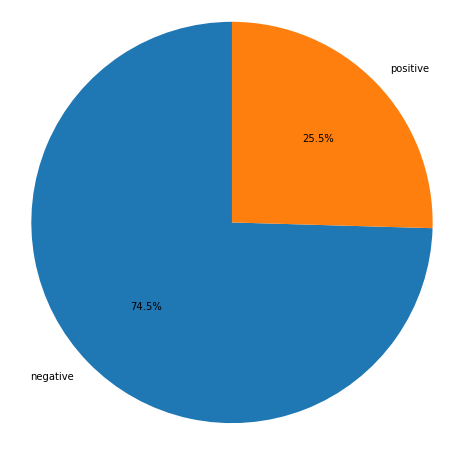

In [198]:
plt.figure(figsize=(8, 8))
plt.pie(counts_km_1, labels=counts_km_1.index, autopct='%1.1f%%', startangle=90)
plt.axis('equal')
plt.show()

Berdasarkan pie chart di atas, tampak bahwa sebagian besar responden (74.5%) memiliki sentimen negatif terhadap lingkungan media sosial yang dianggap toxic dan mengganggu kesehatan mental. Sementara itu, sekitar 25.5% responden memiliki sentimen positif, yang menunjukkan mereka tidak merasa lingkungan media sosial berdampak signifikan terhadap kesehatan mental mereka. Ini menunjukkan bahwa banyak responden merasa lingkungan media sosial dapat menjadi toxic dan berpotensi merusak kesehatan mental.

# Faktor Analisis (Analisis Multivariate)

In [199]:
from factor_analyzer import FactorAnalyzer
from factor_analyzer.factor_analyzer import calculate_kmo, calculate_bartlett_sphericity

## 1) Memilih variabel yang akan difaktorkan

Pertama-tama kita akan memilih variabel-variabel yang akan difaktorkan. Variabel yang kami faktorkan adalah variabel - variabel kuisioner skala likert.

In [200]:
fa_df = pd.concat([PPMS.drop("sum_ppms", axis=1), GH.drop("sum_gh", axis=1), KM.drop("sum_km", axis=1), PD.drop("sum_pd", axis=1)], axis=1)

## 2) Mengecek Multikolinearitas

Mengecek apakah variabel-variabel tersebut terjadi Multikolinearitas. Multikolinearitas merupakan terdapat hubungan yang kuat antar variabel bebas. Pada proses ini, ditetapkan terjadi multikolinearitas jika nilai korelasinya lebih tinggi dari 0.9 (90 %). Untuk mengeceknya kita dapat menggunakan method corr() bawaan dari module pandas.

In [201]:
fa_df.corr()[(fa_df.corr()>0.9) & (fa_df.corr()<1)].all()

ppms_1    True
ppms_2    True
ppms_3    True
gh_0      True
gh_1      True
gh_2      True
gh_3      True
gh_4      True
gh_5      True
gh_6      True
km_0      True
km_1      True
km_2      True
km_3      True
km_4      True
km_5      True
km_6      True
km_7      True
km_8      True
km_10     True
pd_0      True
pd_1      True
pd_2      True
pd_3      True
pd_4      True
pd_5      True
pd_6      True
pd_7      True
dtype: bool

Dapat dilihat, diatas bahwa tidak ada korelasi kuat antar variabel bebas. Sehingga tidak ditemukan multikolinearitas dan kita dapat melanjutkan ke proses berikutnya.

## 3) Melakukan Pengujian KMO

Tes Kaiser-Meyer-Olkin (KMO) digunakan untuk mengevaluasi korelasi antar variabel dalam suatu dataset. Pemeriksaan ini diperlukan sebelum menerapkan teknik reduksi dimensi seperti analisis faktor. Skor KMO, yang berkisar antara 0 hingga 1, memberikan indikasi seberapa cocok dataset untuk analisis faktor. Nilai KMO yang lebih besar dari 0,6 umumnya dianggap lebih sesuai untuk analisis faktor, menunjukkan bahwa variabel-variabel dalam dataset memiliki hubungan yang cukup untuk dilakukan reduksi dimensi dengan teknik tersebut.

In [202]:
kmo_all, kmo_model = calculate_kmo(fa_df)

C:\Users\ramad\anaconda3\lib\site-packages\factor_analyzer\utils.py:244: UserWarning: The inverse of the variance-covariance matrix was calculated using the Moore-Penrose generalized matrix inversion, due to its determinant being at or very close to zero.
  warnings.warn(


In [203]:
kmo_model

0.6356875999232966

Dapat dilihat skor KMO yang diperoleh, sudah diatas 0,6 maka data ini sesuai untuk dilakukan analisis faktor.

## 4) Menentukan Jumlah Faktor yang Optimal Menggunakan Scree Plot

Dalam analisis faktor, jumlah faktor yang dihasilkan biasanya sama dengan jumlah variabel dalam dataset. Namun, sebagian besar informasi yang bernilai terkandung dalam hanya beberapa faktor. Dengan memperhatikan hanya beberapa faktor, kita masih bisa mendapatkan representasi data yang baik. Scree plot dapat digunakan untuk menentukan jumlah faktor dengan memplot faktor-faktor terhadap nilai eigen. Nilai eigen memberikan gambaran seberapa besar varians atau informasi dalam dataset yang dijelaskan oleh faktor-faktor tersebut. Aturan praktisnya adalah memilih faktor-faktor yang memiliki nilai eigen lebih besar dari 1. Sebab variabel biasanya berskala, nilai eigen satu variabel sama dengan 1. Oleh karena itu, faktor-faktor yang berguna perlu menjelaskan lebih banyak informasi daripada satu variabel, karena suatu faktor dimaksudkan sebagai kombinasi variabel.

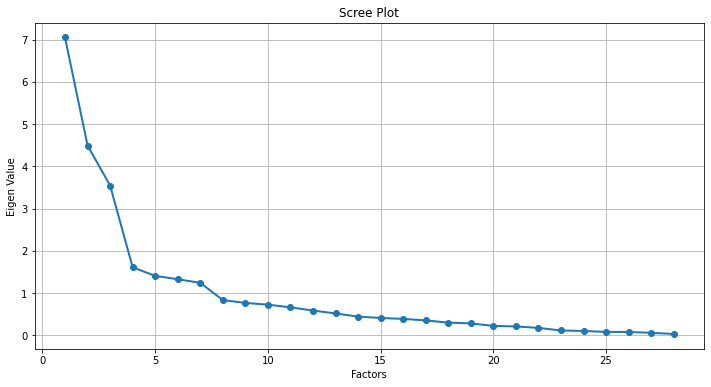

In [204]:
fa = FactorAnalyzer(rotation='varimax', n_factors=fa_df.shape[1])
fa.fit(fa_df)
ev,_ = fa.get_eigenvalues()

factor_values = np.arange(fa_df.shape[1]) + 1

plt.figure(figsize= (12,6))

plt.plot(factor_values,ev, 'o-', linewidth=2)
plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigen Value')
plt.grid()

Dapat dilihat pada scree plot, jumlah faktor yang paling optimal adalah faktor ke-7. Hal ini dibuktikan dari faktor ke-7 merupakan faktor sebelum elbow. Elbow sendiri merupakan poin di mana grafik menurun secara signifikan dan kemudian mulai melandai

## 5) Mengimplementasi Analisis Faktor menggunakan faktor yang optimal

Setelah kita mendapatkan faktor yang optimal pada langkah sebelumnya, selanjutnya kita akan mengimplementasikan faktor tadi ke dalam model faktor analisis.

In [205]:
fa = FactorAnalyzer(n_factors=7, rotation='varimax')
fa.fit(fa_df)

FactorAnalyzer(n_factors=7, rotation='varimax', rotation_kwargs={})

## 6) Menganalisis Faktor yang Terbentuk

Pada langkah menganalisis faktor yang terbentuk, dibagi lagi dalam 2 sub langkah yaitu menentukan nilai loading dan menentukan nilai komunalitasnya.

### 6a) Menentukan Nilai Loading

Dalam analisis faktor, nilai loading merujuk pada seberapa kuat variabel-variabel dalam dataset terkait dengan faktor-faktor yang dihasilkan oleh analisis tersebut. Secara lebih spesifik, nilai loading menunjukkan seberapa besar kontribusi atau korelasi antara masing-masing variabel dengan masing-masing faktor.

In [206]:
loadings_output = pd.DataFrame(fa.loadings_,
                              index=fa_df.columns)
loadings_output

,0,1,2,3,4,5,6
ppms_1,0.018118,0.144278,0.205409,0.824045,0.025391,-0.064403,1.120546e-01
ppms_2,0.000408,0.329417,0.022831,0.923455,0.082298,0.164726,-5.891341e-07
ppms_3,0.020757,0.049698,-0.084071,0.097321,0.020529,-0.040451,7.436537e-01
gh_0,0.215741,0.755935,-0.151983,0.192201,-0.134603,-0.066060,-1.381691e-01
gh_1,0.142115,0.774330,-0.016578,0.153645,-0.095370,0.030721,-1.431053e-02
gh_2,-0.083941,0.727012,-0.110710,0.104951,0.149076,0.199920,2.586561e-01
gh_3,0.152644,0.689017,0.045110,0.028785,-0.062116,-0.108712,3.032969e-03
gh_4,0.140188,0.794944,0.008113,0.107982,0.073288,0.063203,-5.157905e-02
gh_5,0.063909,0.439476,0.362670,0.070191,0.049620,-0.088145,1.900217e-01
gh_6,-0.065891,0.698644,-0.052789,-0.052476,0.081310,0.004412,3.100470e-02


Agar lebih mudah untuk diinterpretasikan, kita perlu melakukan filtering dengan ambang batas 0,5 pada nilai loading, variabel yang lolos pada proses filtering ini berkorelasi kuat dengan faktor.

In [207]:
loadings_output.where(abs(loadings_output) > 0.5)

,0,1,2,3,4,5,6
ppms_1,NaN,NaN,NaN,0.824045,NaN,NaN,NaN
ppms_2,NaN,NaN,NaN,0.923455,NaN,NaN,NaN
ppms_3,NaN,NaN,NaN,NaN,NaN,NaN,0.743654
gh_0,NaN,0.755935,NaN,NaN,NaN,NaN,NaN
gh_1,NaN,0.774330,NaN,NaN,NaN,NaN,NaN
gh_2,NaN,0.727012,NaN,NaN,NaN,NaN,NaN
gh_3,NaN,0.689017,NaN,NaN,NaN,NaN,NaN
gh_4,NaN,0.794944,NaN,NaN,NaN,NaN,NaN
gh_5,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gh_6,NaN,0.698644,NaN,NaN,NaN,NaN,NaN


### 6b) Menentukan Nilai Komunalitas

Nilai komunalitas dalam analisis faktor adalah ukuran sejauh mana variabilitas suatu variabel dapat dijelaskan oleh faktor-faktor yang dihasilkan oleh analisis faktor. Nilai komunalitas berkisar antara 0 hingga 1 dan menunjukkan proporsi variabilitas suatu variabel yang dapat dijelaskan oleh faktor-faktor tersebut. Dengan kata lain, nilai komunalitas mengukur sejauh mana suatu variabel dapat dijelaskan atau diatribusikan oleh faktor-faktor yang dihasilkan oleh analisis faktor.

In [208]:
comunalities = pd.DataFrame(fa.get_communalities(),
            index=fa_df.columns,
            columns=['Communalities'])
comunalities

,Communalities
ppms_1,0.759736
ppms_2,0.995714
ppms_3,0.574519
gh_0,0.719594
gh_1,0.653909
gh_2,0.687958
gh_3,0.516594
gh_4,0.675340
gh_5,0.380020
gh_6,0.505578


Berdasarkan tabel komunalitas di atas, masih terdapat variabel yang memiliki nilai komunalitas kurang dari 0,5. Maka perlu membuang variabel dan melakukan analisis faktor kembali.

## 7) Melakukan Analisis Faktor Kedua

In [209]:
res = [e for e in fa_df.columns if e not in comunalities.index[comunalities["Communalities"] < 0.45].tolist()]
fa_df = fa_df[res]

### 7a) Mengecek Multikolinearitas

In [210]:
fa_df.corr()[(fa_df.corr()>0.9) & (fa_df.corr()<1)].all()

ppms_1    True
ppms_2    True
ppms_3    True
gh_0      True
gh_1      True
gh_2      True
gh_3      True
gh_4      True
gh_6      True
km_0      True
km_1      True
km_2      True
km_3      True
km_4      True
km_5      True
km_6      True
km_7      True
km_10     True
pd_0      True
pd_1      True
pd_2      True
pd_3      True
pd_4      True
pd_5      True
pd_6      True
pd_7      True
dtype: bool

### 7b) Melakukan Pengujian KMO

In [211]:
kmo_all, kmo_model = calculate_kmo(fa_df)

C:\Users\ramad\anaconda3\lib\site-packages\factor_analyzer\utils.py:244: UserWarning: The inverse of the variance-covariance matrix was calculated using the Moore-Penrose generalized matrix inversion, due to its determinant being at or very close to zero.
  warnings.warn(


In [212]:
kmo_model

0.6502778616381578

### 7c) Menentukan Jumlah Faktor yang Optimal Menggunakan Scree Plot

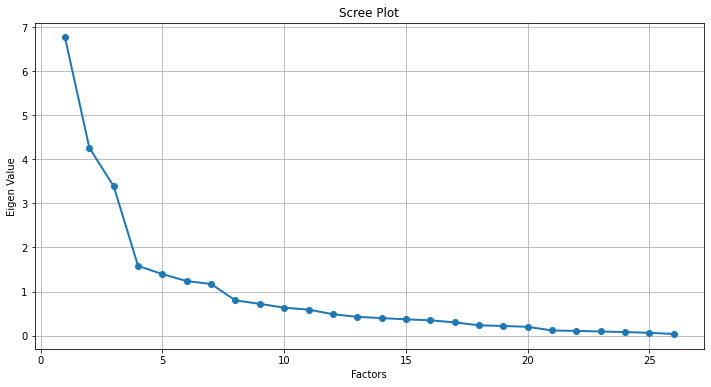

In [213]:
fa = FactorAnalyzer(rotation='varimax', n_factors=fa_df.shape[1])
fa.fit(fa_df)
ev,_ = fa.get_eigenvalues()

factor_values = np.arange(fa_df.shape[1]) + 1

plt.figure(figsize= (12,6))

plt.plot(factor_values,ev, 'o-', linewidth=2)
plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigen Value')
plt.grid()

### 7d) Mengimplementasi Analisis Faktor menggunakan faktor yang optimal

In [214]:
fa = FactorAnalyzer(n_factors=7, rotation='varimax')
fa.fit(fa_df)

FactorAnalyzer(n_factors=7, rotation='varimax', rotation_kwargs={})

### 7e) 6) Menganalisis Faktor yang Terbentuk

In [215]:
loadings_output = pd.DataFrame(fa.loadings_,
                              index=fa_df.columns)
loadings_output

,0,1,2,3,4,5,6
ppms_1,0.023855,0.198124,0.139154,0.871566,-0.003206,-0.106733,0.118307
ppms_2,-0.008430,0.057510,0.331935,0.884117,0.087957,0.182904,0.003751
ppms_3,0.026923,-0.091505,0.032987,0.104336,0.037853,-0.043722,0.675140
gh_0,0.215421,-0.181280,0.749973,0.195204,-0.086784,-0.053027,-0.123318
gh_1,0.150823,-0.050466,0.762401,0.162661,-0.096711,0.039466,-0.028106
gh_2,-0.088827,-0.028984,0.738296,0.094295,0.148315,0.183754,0.312825
gh_3,0.166278,0.034716,0.702419,0.035072,-0.089911,-0.170770,0.024647
gh_4,0.147437,0.029622,0.797336,0.110434,0.046371,0.061073,-0.049073
gh_6,-0.061555,-0.032067,0.693071,-0.050616,0.087911,0.006274,0.037917
km_0,0.542383,-0.014579,0.021460,0.037407,0.108807,0.530107,-0.086135


In [216]:
loadings_output.where(abs(loadings_output) > 0.5)

,0,1,2,3,4,5,6
ppms_1,NaN,NaN,NaN,0.871566,NaN,NaN,NaN
ppms_2,NaN,NaN,NaN,0.884117,NaN,NaN,NaN
ppms_3,NaN,NaN,NaN,NaN,NaN,NaN,0.67514
gh_0,NaN,NaN,0.749973,NaN,NaN,NaN,NaN
gh_1,NaN,NaN,0.762401,NaN,NaN,NaN,NaN
gh_2,NaN,NaN,0.738296,NaN,NaN,NaN,NaN
gh_3,NaN,NaN,0.702419,NaN,NaN,NaN,NaN
gh_4,NaN,NaN,0.797336,NaN,NaN,NaN,NaN
gh_6,NaN,NaN,0.693071,NaN,NaN,NaN,NaN
km_0,0.542383,NaN,NaN,NaN,NaN,0.530107,NaN


In [217]:
comunalities = pd.DataFrame(fa.get_communalities(),
            index=fa_df.columns,
            columns=['Communalities'])
comunalities

,Communalities
ppms_1,0.844211
ppms_2,0.936427
ppms_3,0.480230
gh_0,0.705383
gh_1,0.644708
gh_2,0.716325
gh_3,0.561330
gh_4,0.678844
gh_6,0.496932
km_0,0.596524


## 8) Menginterpretasi Hasil Faktor Analisis

#### Faktor 1 (Kesehatan Mental pada Media Sosial):
- km_1
- km_2
- km_3
- km_4
- km_5
- km_6
- km_7
- km_10

#### Faktor 2 (Tingkat Depresi):
- pd_2
- pd_4
- pd_5
- pd_7

#### Faktor 3 (Gaya Hidup):
- gh_0
- gh_1
- gh_2
- gh_3
- gh_4
- gh_6

#### Faktor 4 (Kehidupan Bermedia Sosial):
- ppms_1
- ppms_2

#### Faktor 6 (Pemakaian Media Sosial):
- ppms_3

### 8a) Tingkat Depresi

In [258]:
td = fa_df[["pd_2", "pd_4", "pd_5", "pd_7"]]
td.loc[:, "summary_td"] = td.mean(axis=1)

C:\Users\ramad\AppData\Local\Temp\ipykernel_8072\2997149134.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  td.loc[:, "summary_td"] = td.mean(axis=1)


Kami menghitung rata-rata dari faktor tingkat depresi tiap responden untuk mengukur tingkat depresi responden. Acuan pengukuran yang kami pakai rata-rata 1 mengindikasikan tidak ada depresi, rata - rata 1 sampai 2 mengindikasikan depresi ringan, rata - rata 2 sampai 3 mengindikasikan depresi sedang dan rata - rata 3 sampai 4 mengindikasikan depresi berat.

In [259]:
def tingkat_depresi(col):
    if col == 1:
        depresi = "tidak ada"
    elif 1 < col <= 2:
        depresi = "ringan"
    elif 2 < col <= 3:
        depresi = "sedang"
    else:
        depresi = "berat"
    return depresi

td["Tingkat Depresi"] = td["summary_td"].apply(tingkat_depresi)

C:\Users\ramad\AppData\Local\Temp\ipykernel_8072\4292940986.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  td["Tingkat Depresi"] = td["summary_td"].apply(tingkat_depresi)


<AxesSubplot:xlabel='Tingkat Depresi', ylabel='count'>

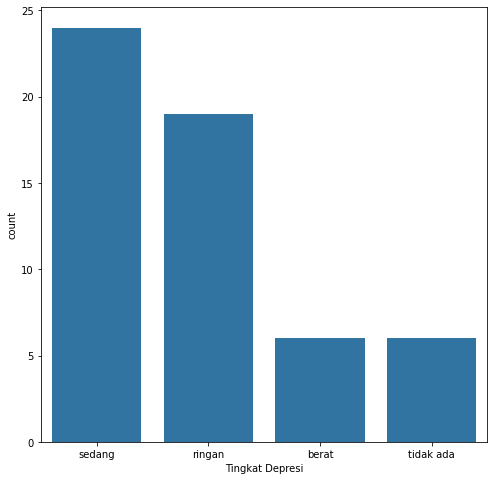

In [260]:
plt.figure(figsize=(8,8))
sns.countplot(x="Tingkat Depresi", data=td)

Berdasarkan barchart yang Anda berikan, tampak bahwa tingkat depresi di kalangan mahasiswa Teknik Lingkungan UPN Veteran Jawa Timur bervariasi. Mayoritas mahasiswa, dengan jumlah mendekati 25, mengalami depresi sedang. Diikuti oleh tingkat depresi ringan dengan jumlah sedikit di bawah 20. Sedangkan, jumlah mahasiswa yang mengalami depresi berat dan tidak mengalami depresi sama sekali masing - masing 6. Ini menunjukkan bahwa isu kesehatan mental sangat relevan dan perlu mendapatkan perhatian lebih di kalangan mahasiswa.

### 8b) Gaya Hidup

In [232]:
gh = df[["Jenis Kelamin",  "Umur"]].join(fa_df[["gh_0","gh_1","gh_2","gh_3","gh_4","gh_6"]])

In [246]:
gh

,Jenis Kelamin,Umur,gh_0,gh_1,gh_2,gh_3,gh_4,gh_6
0,Perempuan,19,4,4,1,4,4,2
1,Perempuan,19,3,4,1,2,3,4
2,Laki-laki,18,2,3,2,2,2,2
3,Laki-laki,20,2,3,2,2,3,2
4,Laki-laki,19,2,2,1,2,2,1
5,Laki-laki,19,1,2,2,1,2,1
6,Laki-laki,19,2,2,2,1,3,1
7,Perempuan,20,4,4,3,4,4,2
8,Laki-laki,22,2,2,2,2,2,1
9,Laki-laki,19,1,1,1,1,1,1


#### Seberapa sering mengakses Online Shop pada Media Sosial berdasarkan Usia

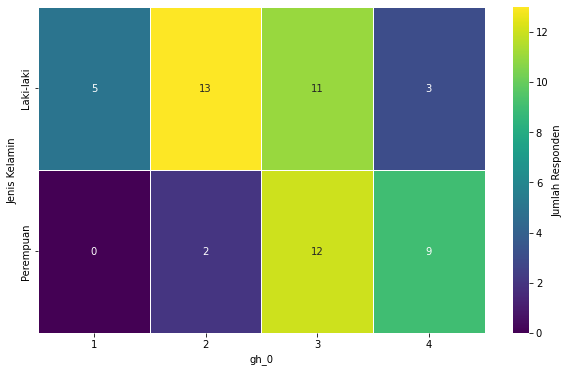

In [240]:
plt.figure(figsize=(10, 6))
heatmap_data = gh.pivot_table(index='Jenis Kelamin', columns='gh_0', aggfunc='size', fill_value=0)
sns.heatmap(heatmap_data, cmap='viridis', annot=True, fmt='d', linewidths=.5, cbar_kws={'label': 'Jumlah Responden'})
plt.show()

Dari heatmap di atas, dapat dilihat bahwa responden perempuan lebih sering mengakses online shop pada media sosial ketimbang responden laki-laki. Hal ini dibuktikan dari skala 3 (Sering) dan skala 4 (Sangat Sering) banyak diisi oleh responden perempuan.

#### Seberapa sering mengakses Online Shop pada Media Sosial berdasarkan Umur

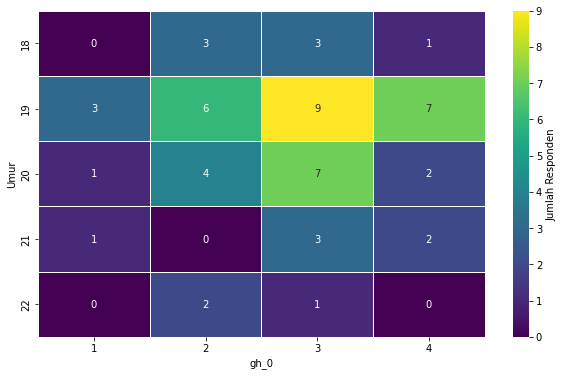

In [241]:
plt.figure(figsize=(10, 6))
heatmap_data = gh.pivot_table(index='Umur', columns='gh_0', aggfunc='size', fill_value=0)
sns.heatmap(heatmap_data, cmap='viridis', annot=True, fmt='d', linewidths=.5, cbar_kws={'label': 'Jumlah Responden'})
plt.show()

Dari heatmap di atas:
- responden berusia 18 tahun, jumlah responden yang sering dan jarang mengakses Online Shop pada Media Sosial sama yaitu 3.
- responden berusia 19 tahun didominasi yang sering mengakses Online Shop pada Media Sosial.
- responden berusia 20 tahun didominasi yang sering mengakses Online Shop pada Media Sosial.
- responden berusia 21 tahun didominasi yang sering mengakses Online Shop pada Media Sosial.
- responden berusia 22 tahun didominasi yang jarang mengakses Online Shop pada Media Sosial.

#### Seberapa sering suatu online shop pada media sosial yang membuat anda tertarik untuk membeli produk yang ditawarkan berdasarkan Jenis Kelamin

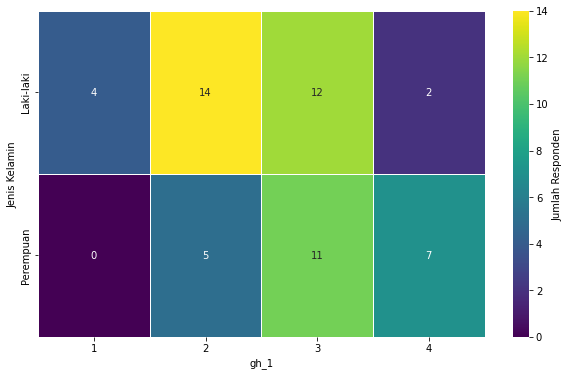

In [242]:
plt.figure(figsize=(10, 6))
heatmap_data = gh.pivot_table(index='Jenis Kelamin', columns='gh_1', aggfunc='size', fill_value=0)
sns.heatmap(heatmap_data, cmap='viridis', annot=True, fmt='d', linewidths=.5, cbar_kws={'label': 'Jumlah Responden'})
plt.show()

Dari heatmap diatas, didapatkan:
- Responden laki-laki cenderung jarang tertarik untuk membeli produk yang ditawarkan dengan jumlah 14 responden, ada juga responden laki-laki yang cenderung sering tertarik untuk membeli produk yang ditawarkan dengan jumlah 12 responden.
- Responden perempuan cenderung sering tertarik untuk membeli produk yang ditawarkan dengan jumlah 11 responden.

#### Seberapa sering suatu online shop pada media sosial yang membuat anda tertarik untuk membeli produk yang ditawarkan berdasarkan Usia

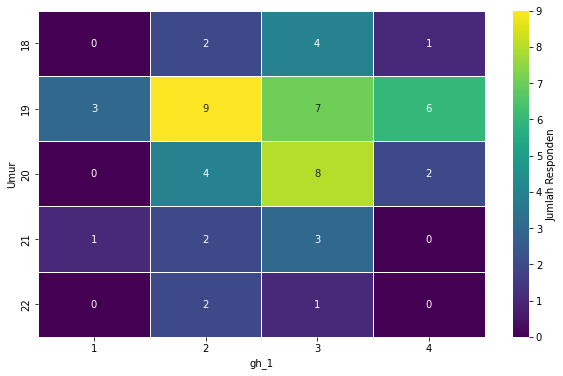

In [243]:
plt.figure(figsize=(10, 6))
heatmap_data = gh.pivot_table(index='Umur', columns='gh_1', aggfunc='size', fill_value=0)
sns.heatmap(heatmap_data, cmap='viridis', annot=True, fmt='d', linewidths=.5, cbar_kws={'label': 'Jumlah Responden'})
plt.show()

Dari heatmap diatas:
- Responden berusia 18 tahun cenderung sering membeli produk yang ditawarkan.
- Responden berusia 19 tahun cenderung jarang membeli produk yang ditawarkan, sisanya antara sering dan sangat sering.
- Responden berusia 20 tahun cenderung sering membeli produk yang ditawarkan.
- Responden berusia 21 tahun cenderung sering membeli produk yang ditawarkan, sisanya jarang membeli produk yang ditawarkan sebanyak 2 responden dan tidak pernah membeli produk yang ditawarkan sebanyak 1 responden.
- Responden berusia 22 tahun cenderung jarang membeli produk yang ditawarkandan 1 responden yang sering membeli produk yang ditawarkan.

#### Seberapa sering membeli produk yang ditawarkan di media sosial karena ada hadiah tambahan berdasarkan jenis kelamin

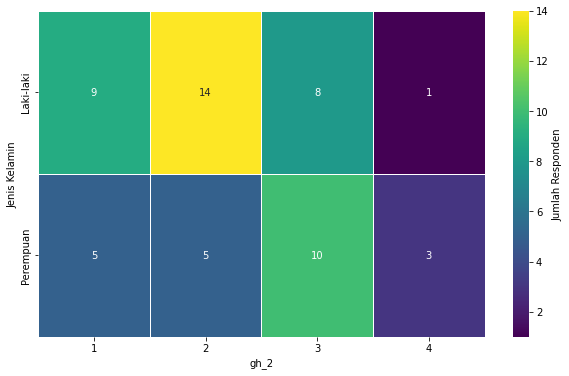

In [244]:
plt.figure(figsize=(10, 6))
heatmap_data = gh.pivot_table(index='Jenis Kelamin', columns='gh_2', aggfunc='size', fill_value=0)
sns.heatmap(heatmap_data, cmap='viridis', annot=True, fmt='d', linewidths=.5, cbar_kws={'label': 'Jumlah Responden'})
plt.show()

Dari heatmap diatas:
- Responden laki-laki cenderung jarang membeli produk yang ditawarkan di media sosial karena ada hadiah tambahan.
- Responden perempuan sering membeli produk yang ditawarkan di media sosial karena ada hadiah tambahan.

Hal ini membuktikan bahwa responden perempuan lebih tertarik membeli produk karena ada hadiah tambahan ketimbang responden pria.

#### Seberapa sering membeli produk yang ditawarkan di media sosial karena ada hadiah tambahan berdasarkan usia

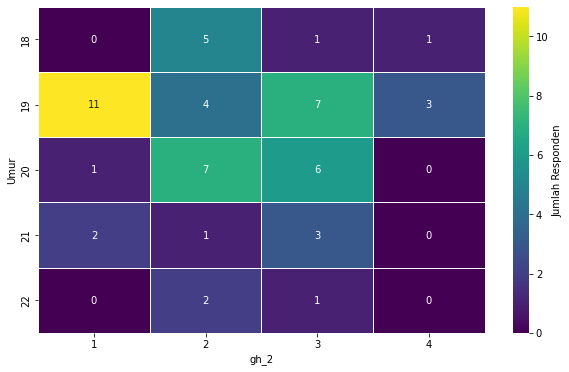

In [245]:
plt.figure(figsize=(10, 6))
heatmap_data = gh.pivot_table(index='Umur', columns='gh_2', aggfunc='size', fill_value=0)
sns.heatmap(heatmap_data, cmap='viridis', annot=True, fmt='d', linewidths=.5, cbar_kws={'label': 'Jumlah Responden'})
plt.show()

Dari heatmap diatas:
- Responden berusia 18 dan 22 tahun cenderung jarang membeli produk yang ditawarkan di media sosial karena ada hadiah tambahan.
- Responden berusia 19 tahun cenderung tidak pernah membeli produk yang ditawarkan di media sosial karena ada hadiah tambahan.
- Responden berusia 20 tahun cenderung jarang membeli produk yang ditawarkan di media sosial karena ada hadiah tambahan, sisanya sering membeli produk yang ditawarkan di media sosial karena ada hadiah tambahan dengan jumlah 6 responden.
- Responden 21 tahun cenderung sering membeli produk yang ditawarkan di media sosial karena ada hadiah tambahan, sisanya antara tidak pernah membeli produk yang ditawarkan di media sosial karena ada hadiah tambahan dan jarang membeli produk yang ditawarkan di media sosial karena ada hadiah tambahan.

#### Seberapa sering membeli produk yang ditawarkan di media sosial karena review bagus influencer berdasarkan jenis kelamin

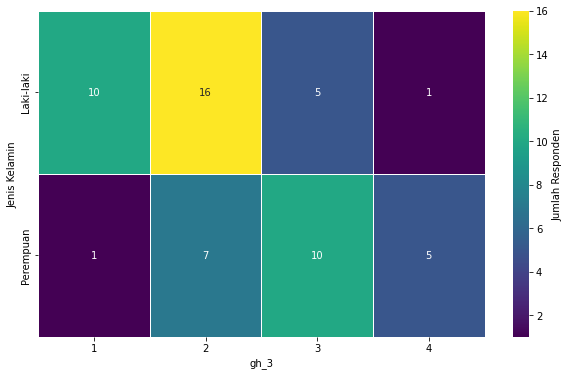

In [247]:
plt.figure(figsize=(10, 6))
heatmap_data = gh.pivot_table(index='Jenis Kelamin', columns='gh_3', aggfunc='size', fill_value=0)
sns.heatmap(heatmap_data, cmap='viridis', annot=True, fmt='d', linewidths=.5, cbar_kws={'label': 'Jumlah Responden'})
plt.show()

Dari heatmap diatas:
- Responden laki-laki lebih dominan jarang membeli produk yang ditawarkan di media sosial karena review bagus influencer, bahkan 10 responden laki-laki tidak pernah membeli produk yang ditawarkan di media sosial karena review bagus influencer.
- Responden perempuan cenderung sering membeli produk yang ditawarkan di media sosial karena review bagus influencer.

Hal ini membuktikan bahwa responden perempuan cenderung memakai review influencer sebagai keputusan sebelum membeli produk di media sosial ketimbang responden laki-laki.

#### Seberapa sering membeli produk yang ditawarkan di media sosial karena review bagus influencer berdasarkan usia

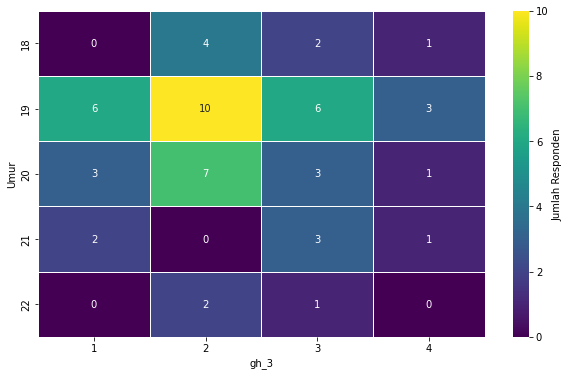

In [248]:
plt.figure(figsize=(10, 6))
heatmap_data = gh.pivot_table(index='Umur', columns='gh_3', aggfunc='size', fill_value=0)
sns.heatmap(heatmap_data, cmap='viridis', annot=True, fmt='d', linewidths=.5, cbar_kws={'label': 'Jumlah Responden'})
plt.show()

Dari heatmap di atas:
- Responden berusia 18, 19, 20 dan 22 tahun cenderung jarang membeli produk yang ditawarkan di media sosial karena review bagus influencer.
- Responden berusia 21 tahun cenderung sering membeli produk yang ditawarkan di media sosial karena review bagus influencer. Meskipun terdapat 2 responden yang tidak pernah membeli produk yang ditawarkan di media sosial karena review bagus influencer dan 1 responden yang sangat sering membeli produk yang ditawarkan di media sosial karena review bagus influencer.

#### Seberapa sering membeli produk yang ditawarkan di media sosial karena ada diskon yang jauh lebih besar daripada di offline shop berdasarkan jenis kelamin

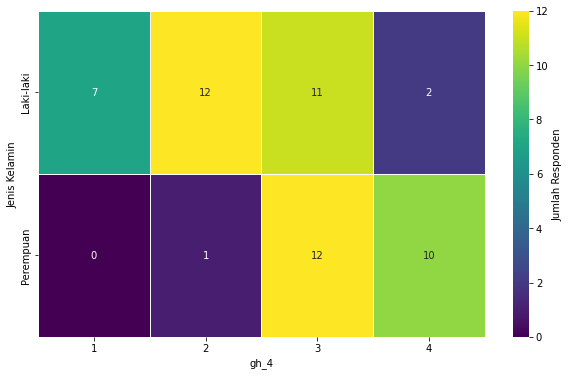

In [249]:
plt.figure(figsize=(10, 6))
heatmap_data = gh.pivot_table(index='Jenis Kelamin', columns='gh_4', aggfunc='size', fill_value=0)
sns.heatmap(heatmap_data, cmap='viridis', annot=True, fmt='d', linewidths=.5, cbar_kws={'label': 'Jumlah Responden'})
plt.show()

Dari heatmap diatas:
- Responden laki-laki yang cenderung jarang membeli produk yang ditawarkan di media sosial karena ada diskon yang jauh lebih besar daripada di offline shop sebanyak 12 responden, meskipun begitu jumlah responden yang sering membeli produk yang ditawarkan di media sosial karena ada diskon yang jauh lebih besar daripada di offline shop juga cukup tinggi sebanyak 11 responden.
- Pada responden perempuan, responden cenderung memilih sering dan sangat sering pada Seberapa sering membeli produk yang ditawarkan di media sosial karena ada diskon yang jauh lebih besar daripada di offline shop, sedangkan untuk jarang hanya ada 1 responden.

#### Seberapa sering membeli produk yang ditawarkan di media sosial karena ada diskon yang jauh lebih besar daripada di offline shop berdasarkan usia

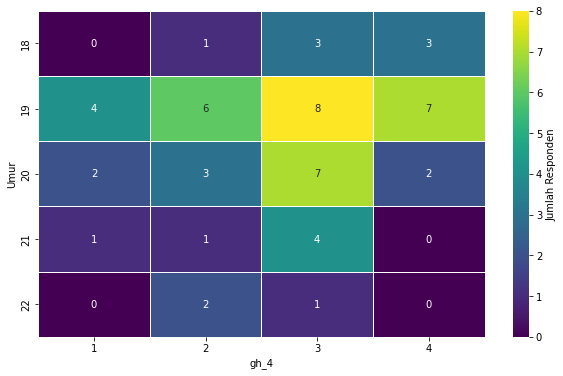

In [250]:
plt.figure(figsize=(10, 6))
heatmap_data = gh.pivot_table(index='Umur', columns='gh_4', aggfunc='size', fill_value=0)
sns.heatmap(heatmap_data, cmap='viridis', annot=True, fmt='d', linewidths=.5, cbar_kws={'label': 'Jumlah Responden'})
plt.show()

Dari heatmap diatas:
- Pada responden berusia 18 tahun, mereka cenderung sering dan sangat sering membeli produk yang ditawarkan di media sosial karena ada diskon yang jauh lebih besar daripada di offline shop.
- Responden berusia 19 tahun cenderung sering membeli produk yang ditawarkan di media sosial karena ada diskon yang jauh lebih besar daripada di offline shop, tetapi jumlah responden yang jarang dan sangat sering membeli produk yang ditawarkan di media sosial karena ada diskon yang jauh lebih besar daripada di offline shop juga cukup banyak.
- Responden berusia 20 dan 21 tahun cenderung sering membeli produk yang ditawarkan di media sosial karena ada diskon yang jauh lebih besar daripada di offline shop.
- Responden berusia 22 tahun cenderung jarang membeli produk yang ditawarkan di media sosial karena ada diskon yang jauh lebih besar daripada di offline shop.

#### Seberapa sering anda sebelum Tiktok Shop ditutup, anda membeli barang di media sosial tersebut berdasarkan jenis kelamin

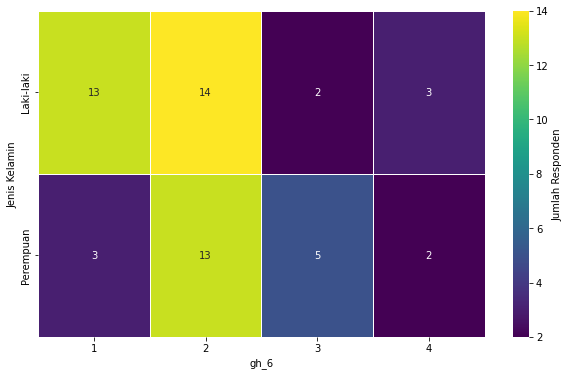

In [251]:
plt.figure(figsize=(10, 6))
heatmap_data = gh.pivot_table(index='Jenis Kelamin', columns='gh_6', aggfunc='size', fill_value=0)
sns.heatmap(heatmap_data, cmap='viridis', annot=True, fmt='d', linewidths=.5, cbar_kws={'label': 'Jumlah Responden'})
plt.show()

Dari heatmap diatas:
- Responden Laki-laki cenderung jarang membeli barang di tiktok shop. Bahkan sebanyak 13 responden tidak pernah membeli barang di tiktok shop.
- Responden perempuan cenderung jarang membeli barang di tiktok shop.

Hal ini membuktikan bahwa responden jarang membeli barang di tiktok shop, sebelum tiktok shop ditutup oleh pemerintah.

#### Seberapa sering anda sebelum Tiktok Shop ditutup, anda membeli barang di media sosial tersebut berdasarkan usia

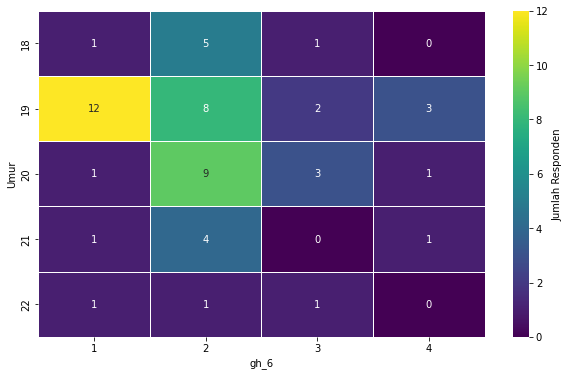

In [252]:
plt.figure(figsize=(10, 6))
heatmap_data = gh.pivot_table(index='Umur', columns='gh_6', aggfunc='size', fill_value=0)
sns.heatmap(heatmap_data, cmap='viridis', annot=True, fmt='d', linewidths=.5, cbar_kws={'label': 'Jumlah Responden'})
plt.show()

Dari heatmap diatas, dapat dilihat bahwa:
- Responden berusia 18, 20, 21 cenderung jarang membeli barang di Tiktok shop.
- Responden berusia 19 tahun cenderung tidak pernah membeli barang di tiktok shop, tetapi ada juga 8 responden yang membeli barang di tiktok shop meskipun jarang.
- Pada responden berusia 22 tahun, mereka ada yang tidak pernah membeli barang di tiktok shop sebanyak 1 responden, jarang membeli barang di tiktok shop sebanyak 1 responden, dan sering membeli barang di tiktok shop sebanyak 1 responden.